In [1]:
import warnings
from astropy.utils.exceptions import AstropyWarning

warnings.filterwarnings('ignore', category=AstropyWarning)

In [2]:
from astropy.coordinates import SkyCoord
from myraflib import Fits

fits = Fits.sample()
fits.data()

array([[ 7201.,  6642.,  6642., ...,  9498.,  9498., 10057.],
       [ 6642.,  6363.,  6642., ..., 10057., 10616., 10616.],
       [ 6922.,  6642.,  6922., ..., 10337., 11175., 10616.],
       ...,
       [ 5412.,  5132.,  5412., ..., 13000., 12580., 12021.],
       [ 5796.,  5517.,  5796., ..., 12546., 12546., 11987.],
       [ 5796.,  5796.,  6076., ..., 11987., 12546., 12546.]])

# save_as
A `Fits` object can save itself to another path

In [3]:
saved_fits = fits.save_as("test.fits", override=True)
saved_fits

Fits(@: '127592182220016', path:'test.fits')

# cosmic_clean
A `Fits` object can clean cosmic rays using `cosmicray_lacosmic`

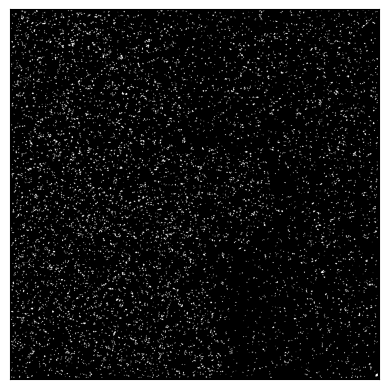

In [4]:
clean_fits = fits.cosmic_clean()
residue = fits - clean_fits
residue.show()

# imstat
A `Fits` object can return statistics of the given fits file

In [5]:
stats = fits.imstat()
stats

,npix,mean,stddev,min,max
image,,,,,
/tmp/spy_m3qpg7hn.fits,795663,9831.481676,3032.392754,3759.0,22918.0


# show
A `Fits` object can display the image data

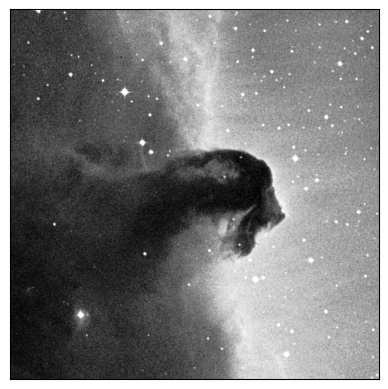

In [6]:
fits.show()

# pixels_to_skys
A `Fits` object can get the coordinates of a given pixel if the WCS is available

In [7]:
sky = fits.pixels_to_skys(10, 10)
sky.sky.iloc[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (85.39691915, -2.58041503)>

# skys_to_pixels
A `Fits` object can get the pixel coordinates of a given actual coordinate if the WCS is available

In [8]:
sky = SkyCoord(85.39691915, -2.58041503, unit="degree")

pixel = fits.skys_to_pixels(sky)
pixel

,sky,xcentroid,ycentroid
image,,,
/tmp/spy_m3qpg7hn.fits,"<SkyCoord (ICRS): (ra, dec) in deg\n (85.39...",9.999991,10.000009
